In [2]:
import cv2
import numpy as np

In [3]:
def show_image(image, title='image'):
    cv2.imshow(title, image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [23]:
# Replace 'path/to/your/image.jpg' with the actual path to your image file
image_path = 'IMG_2458.jpg'

# Read the image from the specified file path
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.resize(image, (500,500))
show_image(image)

In [24]:
#adding noise to the image

def addnoise(image):
    mean = 0
    stddev = 180
    noise = np.zeros(image.shape, np.uint8)
    cv2.randn(noise, mean, stddev)

    noisy_img = cv2.add(image, noise)
    return noisy_img

In [25]:
def high_pass_filter(noisy_img, kernel_size = 3):
    kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size**2)
    blurred = cv2.filter2D(noisy_img, -1, kernel)
    hpf = noisy_img - blurred
    
    return hpf

In [26]:
def low_pass_filter(image, kernel_size=3):
    kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size**2)
    lpf = cv2.filter2D(image, -1, kernel)

    return lpf

In [27]:
def median_filter(noisy_img, kernel_size=3):
    median_filter = cv2.medianBlur(noisy_img, kernel_size)
    return median_filter

In [32]:
def salt_pepper(image):

    noisy_imagesp = np.copy(image)
    num_pixels = int(0.02 * image.size)

    # Add salt noise (white pixels)
    salt_coords = [np.random.randint(0, i - 1, num_pixels) for i in image.shape]
    noisy_imagesp[salt_coords[0], salt_coords[1]] = 255

    # Add pepper noise (black pixels)
    pepper_coords = [np.random.randint(0, i - 1, num_pixels) for i in image.shape]
    noisy_imagesp[pepper_coords[0], pepper_coords[1]] = 0

    return noisy_imagesp


In [33]:
noisy_image = addnoise(image)

show_image(high_pass_filter(noisy_image, 2), 'High Pass Filter')
show_image(low_pass_filter(noisy_image), 'Low Pass Filter')
show_image(median_filter(noisy_image), 'Median Filter')

sp_img = salt_pepper(image)
show_image(high_pass_filter(sp_img, 3), 'Salt&Pepper High Pass Filter')
show_image(low_pass_filter(sp_img), 'Salt&Pepper Low Pass Filter')
show_image(median_filter(sp_img), 'Salt&Pepper Median Filter')

In [28]:
import numpy as np

a = np.array([[26, 27], [25, 31]])
b = np.array([[1, 2], [3, 4]])
c = np.array([[5, 10], [15, 20]])
d = np.array([[10,20], [30,40]])

print(np.kron(a, b))
print(np.kron(b, a))

# print(np.kron(b,a))

[[ 26  52  27  54]
 [ 78 104  81 108]
 [ 25  50  31  62]
 [ 75 100  93 124]]
[[ 26  27  52  54]
 [ 25  31  50  62]
 [ 78  81 104 108]
 [ 75  93 100 124]]


IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

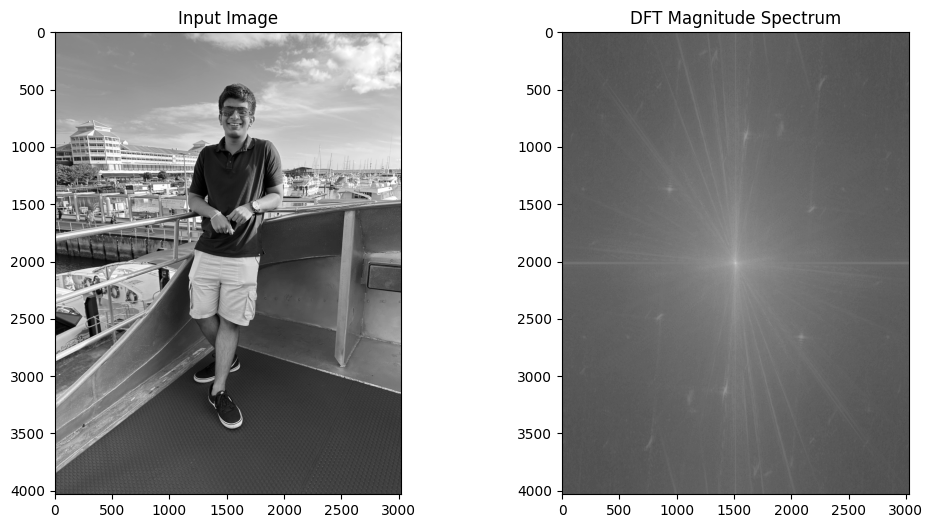

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read the input image
input_image = cv2.imread('IMG_2458_grey.jpg', cv2.COLOR_BGR2GRAY)

# Step 2: Apply DFT Transform to the image
dft = cv2.dft(np.float32(input_image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

# Step 3: Plot the response of DFT Transform
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(input_image, cmap='gray')
plt.title('Input Image')

plt.subplot(122)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('DFT Magnitude Spectrum')

# Step 4: Apply the inverse DFT Transform to the output of Step 2
idft = cv2.idft(dft, flags=cv2.DFT_SCALE | cv2.DFT_REAL_OUTPUT)
output_image = cv2.magnitude(idft[:, :, 0], idft[:, :, 1])

# Step 5: Compare the two images - Input of Step 1 and Output of Step 4
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(input_image, cmap='gray')
plt.title('Input Image')

plt.subplot(122)
plt.imshow(output_image, cmap='gray')
plt.title('Reconstructed Image (Inverse DFT)')

plt.show()

# Optional: You can also save the output image to a file
cv2.imwrite('output_image.jpg', output_image)